In [ ]:
!pip3 install sklearn
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install yfinance
!pip3 install tensorflow

In [42]:
import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

%matplotlib inline

2024-04-09 21:59:23.648588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
data = yf.download('^GSPC', period = '5y', interval = '1d')

[*********************100%%**********************]  1 of 1 completed


1258


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000
2019-04-16,2912.260010,2916.060059,2900.709961,2907.060059,2907.060059,3403120000


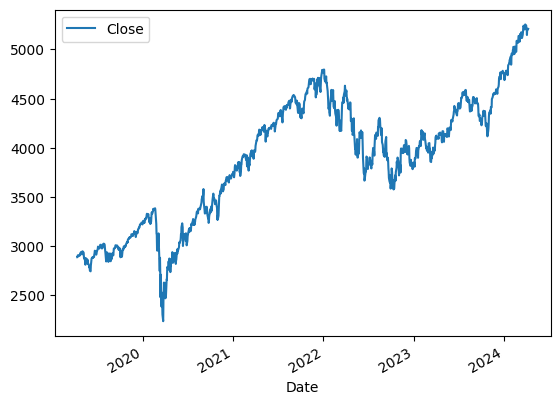

In [17]:
data.plot.line(y= "Close", use_index=True)
print(len(data))
data.head()


In [37]:
train_dataset = data.iloc[:, 4]
train_dataset.head()

Date
2019-04-10    2888.209961
2019-04-11    2888.320068
2019-04-12    2907.409912
2019-04-15    2905.580078
2019-04-16    2907.060059
Name: Adj Close, dtype: float64

In [38]:
train_dataset = train_dataset.values.reshape(-1, 1)
train_dataset_scaled = MinMaxScaler().fit_transform(train_dataset)
print(train_dataset_scaled)

[[0.21571787]
 [0.21575436]
 [0.22208189]
 ...
 [0.98342357]
 [0.98277732]
 [0.98526991]]


In [39]:
x_train = []
y_train = []
for i in range (5, len(train_dataset_scaled)):
    x_train.append(train_dataset_scaled[i-5:i, 0])
    y_train.append(train_dataset_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print (x_train)
print (y_train)

[[0.21571787 0.21575436 0.22208189 0.22147537 0.22196593]
 [0.21575436 0.22208189 0.22147537 0.22196593 0.21977494]
 [0.22208189 0.22147537 0.22196593 0.21977494 0.22129306]
 ...
 [1.         0.99649312 0.98391089 0.98579365 0.96448727]
 [0.99649312 0.98391089 0.98579365 0.96448727 0.98342357]
 [0.98391089 0.98579365 0.96448727 0.98342357 0.98277732]]
[0.21977494 0.22129306 0.22226753 ... 0.98342357 0.98277732 0.98526991]


In [55]:
data_target = data.iloc[:1200,4]
data_test = data.iloc[1201:,4]
steps=7

data = sp_data.loc[:,["Adj Close"]].values
test = data[len(data) - len(data_test) - steps:]

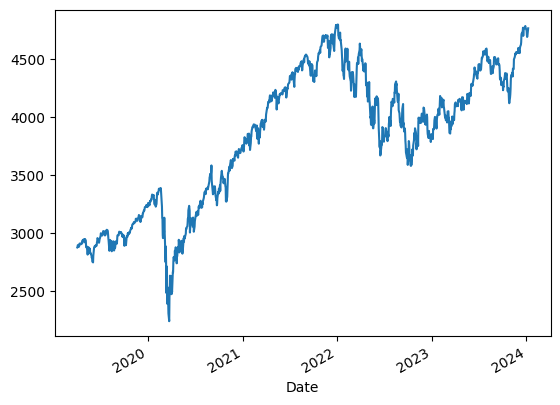

In [56]:
plot = data_target.plot()

In [52]:
def scaledata(data_target):
    #Import scaler and initialise it
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    #transform by converting it to array and shape of (-1,1)
    data_target_scaled = scaler.fit_transform(np.array(data_target).reshape(-1,1))
    #plot the scaled version of data
    plot_scaled = pd.DataFrame(data_target_scaled).plot()
    print(data_target.shape)
    #returns scaled data
    return data_target_scaled, scaler

In [57]:
def createPatternSet(data_target_scaled,steps=7):   
    x_patern = []  #Independent Variable
    y_price = []   #Dependent Variable
    for day in range(steps,data_target_scaled.shape[0]):
        row = data_target_scaled[day-steps:day,0]
        #print(len(row))
        x_patern.append(row)
        y = data_target_scaled[day,0]
        #print(y)
        y_price.append(y)
    
    x_patern,y_price = np.array(x_patern),np.array(y_price)
    #RNN and LSTM takes 3D inputs, we need to change the shape of array to 3 dimensional.
    x_patern = x_patern.reshape(x_patern.shape[0],x_patern.shape[1],1)
    #returns independent and dependent variable sets
    return x_patern,y_price

(1200,)
(1200,)


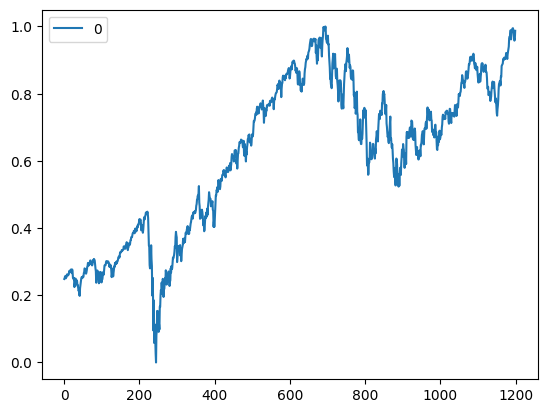

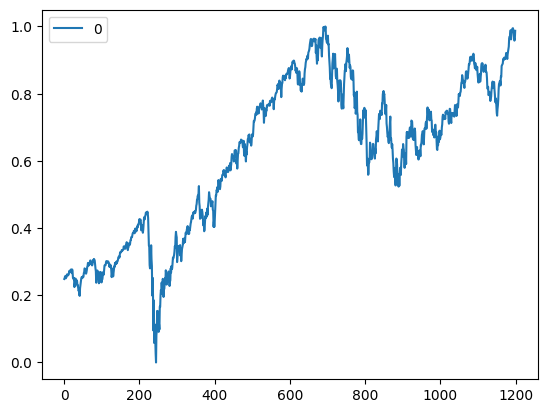

In [60]:
#Scale Down Target
data_target_scaled = scaledata(data_target)[0]
scaler = scaledata(data_target)[1]
#prepare test data
test = data[len(data) - len(data_test) - steps:]
test = scaler.transform(test)